In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
ens = '3296'
nstate_list = [2]

#corrtype = '2pt'
#xlim = [1.7,7.3]
#xticks = [2,3,4,5,6,7]
#xpref = 4

#corrtype = 'd2pt'
#xlim = [1.7,6.3]
#xticks = [2,3,4,5,6]
#xpref = 4

#corrtype = 'gV8'
#xlim = [-0.3,4.3]
#xticks = [0,1,2,3,4]
#xpref = 2

#corrtype = 'dgV8'
#xlim = [-0.3,3.3]
#xticks = [0,1,2,3]
#xpref = 1

#corrtype = 'gV10'
#xlim = [-0.7,4.3]
#xticks = [0,1,2,3,4]
#xpref = 2

corrtype = 'dgV10'
xlim = [-0,3,4.3]
xticks = [0,1,2,3,4]
xpref = 2

npref = 2
filename = './data/%s_stability_%s.csv' %(ens,corrtype)
data = open(filename,'r')
df = pd.read_csv(filename,index_col=0,header=None).T
df

,2state_t,2state_Q,2state_dZ0_q0_mean,2state_dZ0_q0_sdev,2state_dgV_q0_mean,2state_dgV_q0_sdev,2state_dZ0_q1_mean,2state_dZ0_q1_sdev,2state_dgV_q1_mean,2state_dgV_q1_sdev
1,0.0,0.757855,-1.483850,0.011324,-4.177047,0.118902,-1.495032,0.012164,-3.742374,0.115682
2,1.0,0.785742,-1.487401,0.014907,-4.248074,0.059780,-1.499180,0.015262,-3.823541,0.066378
3,2.0,0.835515,-1.472605,0.014691,-4.343782,0.067636,-1.485316,0.016151,-3.847147,0.063317
4,3.0,0.825628,-1.465987,0.015449,-4.315044,0.093118,-1.478257,0.015719,-3.841958,0.087121
5,4.0,0.730039,-1.466936,0.012339,-4.418595,0.125860,-1.477392,0.013758,-3.982826,0.103287


In [89]:
# plot params
figsize = (3.50394*2,2*2.1655535534)
ms = '6'
cs = 6
fs_l = 14
fs_xy = 14
ts = 14
lw = 1
plt_axes = [0.14,0.155,0.825,0.825]
# state and q label
pparam = dict()
# state
pparam['color'] = dict()
pparam['color']['2state'] = 'k' # blue
pparam['color']['q0'] = 'k' # dark blue
pparam['color']['q1'] = 'grey' # dark blue
# q
pparam['shape'] = dict()
pparam['shape']['q0'] = 'o'
pparam['shape']['q1'] = 's'
# label translator
pparam['label'] = dict()
pparam['label']['2pt'] = 'C_{\mathrm{2pt}}(t)\ t_{\mathrm{min}}'
pparam['label']['d2pt'] = 'C^\prime_{\mathrm{2pt}}(t)\ t_{\mathrm{min}}'
pparam['label']['gV8'] = 'C_{\mathrm{3pt}}(8,t^\prime)\ t^\prime_{\mathrm{min}}'
pparam['label']['dgV8'] = 'C^\prime_{\mathrm{3pt}}(8,t^\prime)\ t^\prime_{\mathrm{min}}'
pparam['label']['gV10'] = 'C_{\mathrm{3pt}}(10,t^\prime)\ t^\prime_{\mathrm{min}}'
pparam['label']['dgV10'] = 'C^\prime_{\mathrm{3pt}}(10,t^\prime)\ t^\prime_{\mathrm{max}}'

ValueError: too many values to unpack (expected 2)

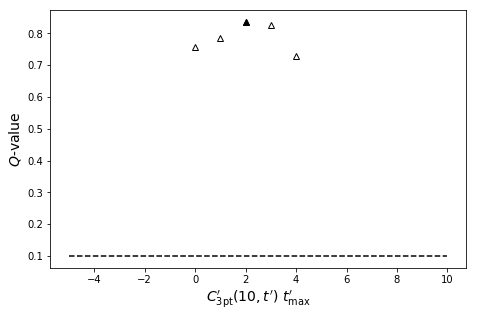

In [90]:
fig = plt.figure('Q-value stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in nstate_list:
    xshifted = x + 0.1*(nstate-2)
    y = df['%sstate_Q' %nstate]
    ax.errorbar(xshifted,y=y,marker='^',color=pparam['color']['%sstate'%nstate],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
# preferred
ax.errorbar(xpref+ 0.1*(npref-2),y=df.loc[df['2state_t']==xpref]['%sstate_Q' %npref],marker='^',color=pparam['color']['%sstate'%npref],capsize=cs,markersize=ms,\
            elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
ax.errorbar(x=[-5,10],y=[0.1,0.1],color='k',ls='--')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$Q$-value', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_%s_Q.pdf' %(ens,corrtype), transparent=True)

ValueError: too many values to unpack (expected 2)

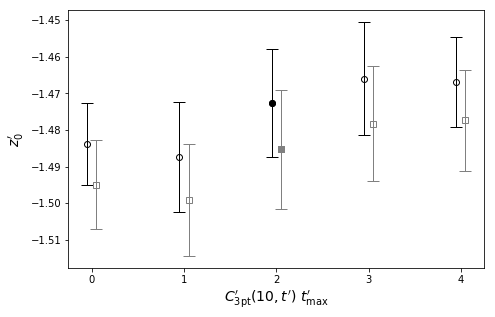

In [87]:
fig = plt.figure('dZ0 stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in nstate_list:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2)
        xshifted = xshifted + 0.1*(q-0.5)
        y = df['%sstate_dZ0_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dZ0_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['q%s' %q],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
# preferred
for q in [0,1]:
    ax.errorbar(xpref+ 0.1*(npref-2)+0.1*(q-0.5),y=df.loc[df['2state_t']==xpref]['%sstate_dZ0_q%s_mean' %(npref,q)],marker=pparam['shape']['q%s' %q],color=pparam['color']['q%s' %q],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$z_0^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_%s_dZ0.pdf' %(ens,corrtype), transparent=True)

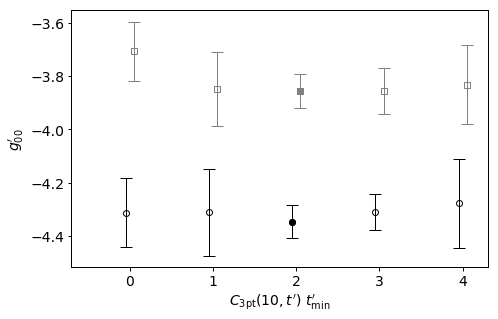

In [83]:
fig = plt.figure('dgV stability plot',figsize=figsize)
ax = plt.axes(plt_axes)
x = df['2state_t']
for nstate in nstate_list:
    for q in [0,1]:
        xshifted = x + 0.1*(nstate-2)
        xshifted = xshifted + 0.1*(q-0.5)
        y = df['%sstate_dgV_q%s_mean' %(nstate,q)]
        yerr = df['%sstate_dgV_q%s_sdev' %(nstate,q)]
        ax.errorbar(xshifted,y=y,yerr=yerr,marker=pparam['shape']['q%s' %q],color=pparam['color']['q%s' %q],capsize=cs,markersize=ms,\
                    elinewidth=lw,mew=lw,fillstyle='none',label='%s-state' %nstate, ls='none')
for q in [0,1]:
    ax.errorbar(xpref+ 0.1*(npref-2)+ 0.1*(q-0.5),y=df.loc[df['2state_t']==xpref]['%sstate_dgV_q%s_mean' %(npref,q)],marker=pparam['shape']['q%s' %q],color=pparam['color']['q%s' %q],capsize=cs,markersize=ms,\
                elinewidth=lw,mew=lw,fillstyle='full',label='%s-state' %npref, ls='none')
#ax.legend(fontsize=fs_l,edgecolor='k',fancybox=False)
ax.set_xlabel(r'$%s$' %pparam['label'][corrtype], fontsize=fs_xy)
ax.set_ylabel(r'$g_{00}^\prime$', fontsize=fs_xy)
ax.set_xlim(xlim)
ax.set_xticks(xticks)
ax.xaxis.set_tick_params(labelsize=ts,width=lw)
ax.yaxis.set_tick_params(labelsize=ts,width=lw)
[ax.spines[key].set_linewidth(lw) for key in ax.spines]
plt.show()
fig.savefig('./figures/%s_%s_dgV.pdf' %(ens,corrtype), transparent=True)